# SQL

- [Reference](https://www.youtube.com/watch?v=yMqldbY2AAg&t=4s&ab_channel=ByteByteGo)

`SQL (Structured Query Language)`: `SQL` is a standard language for managing relational databases. It provides a set of commands for performing various operations such as querying data, updating data, creating and modifying database schema, and managing access controls.

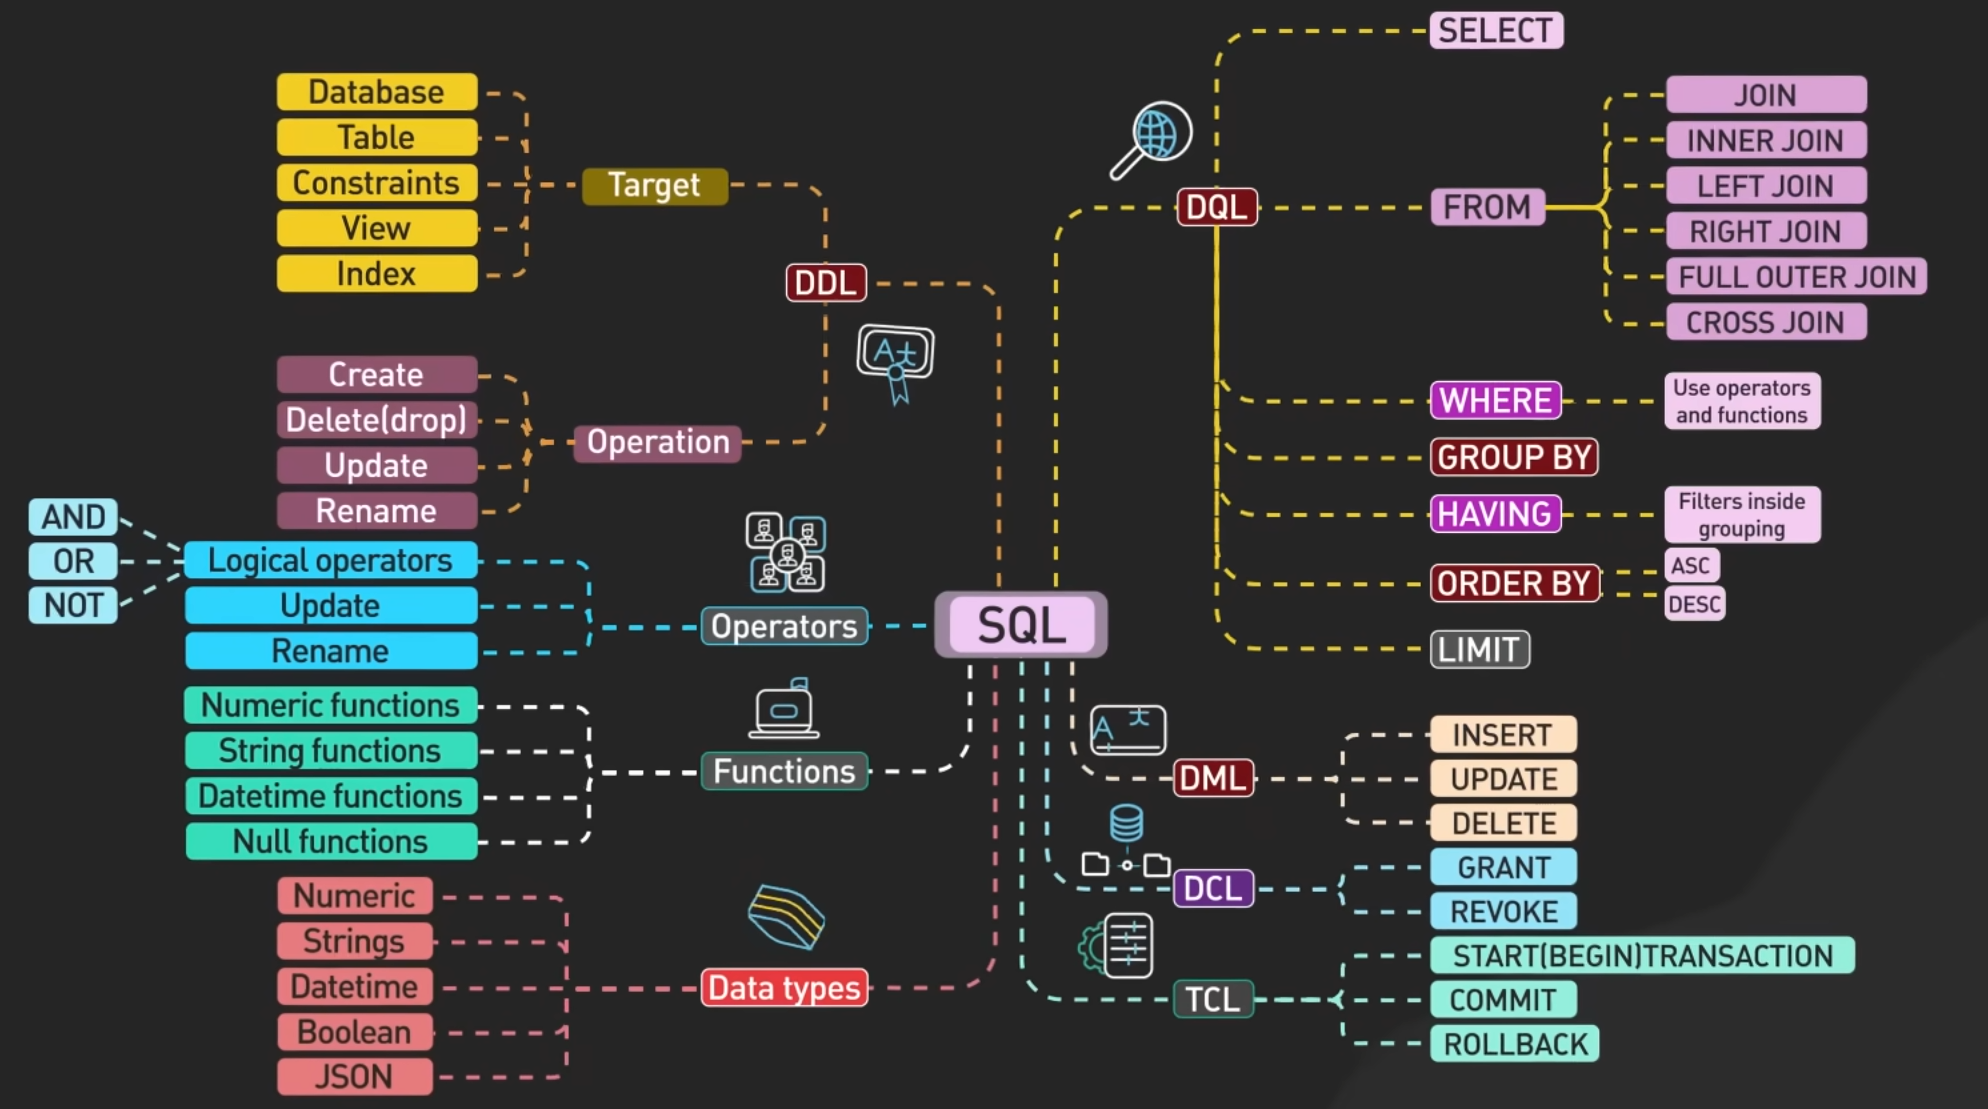


## Key Types in SQL

### Numeric Types

- `INT` (Integer): Represents whole numbers.
- `DECIMAL`: Represents fixed-point numbers with exact precision.

  ```sql
  CREATE TABLE Products (
      ProductID INT PRIMARY KEY,
      Price DECIMAL(10, 2)
  );
  ```

### String Types

- `VARCHAR`: Represents variable-length character strings with a maximum length specified.
- `TEXT`: Represents variable-length character strings with a maximum length that can be extremely large.

  ```sql
  CREATE TABLE Customers (
  CustomerID INT PRIMARY KEY,
  FirstName VARCHAR(50),
  LastName VARCHAR(50),
  Address TEXT
  );
  ```

### Date/Time Types

- `DATE`: Represents a date value without time.
- `TIMESTAMP`: Represents date and time values.

  ```sql
  CREATE TABLE Orders (
  OrderID INT PRIMARY KEY,
  OrderDate DATE,
  LastUpdated TIMESTAMP
  );
  ```

### Boolean Type

- `BIT`: Represents a single bit that can store boolean values (0 or 1).
  ```sql
  CREATE TABLE Employees (
  EmployeeID INT PRIMARY KEY,
  IsActive BIT
  );
  ```


## Database normalization

`Database normalization` is a process used to organize a relational database into tables and columns to **minimize `redundancy` and `dependency`**. It aims to reduce data anomalies such as insertion, update, and deletion anomalies, which can occur when data is not properly organized.

Let's illustrate normalization with a simple example:

Suppose we have a database to store information about `students` and the `courses` they are enrolled in. Initially, we might design a single table like this:

**StudentCourses Table:**

| StudentID | StudentName | Course1   | Course2 | Course3   |
| --------- | ----------- | --------- | ------- | --------- |
| 1         | Alice       | Math      | Physics | Chemistry |
| 2         | Bob         | Physics   | Biology |           |
| 3         | Carol       | Chemistry |         |           |

In this table, each row represents a `student`, and each column represents a `course` they are enrolled in. However, this table violates the principles of normalization because:

1. **Data Redundancy**: The **`course` names are repeated in multiple rows**, leading to redundancy.
2. **Insertion Anomaly**: If a `student` wants to enroll in more `courses` than the available columns, we need to modify the table structure.
3. **Deletion Anomaly**: If we delete a course from the database, we may lose information about which `students` were enrolled in that course.
4. **Update Anomaly**: If we update the name of a `course`, we need to update it in multiple places, which can lead to inconsistencies.

To normalize this database, we can break it down into multiple tables. We'll create separate tables for `Students` and `Courses` and introduce a linking table to represent the `many-to-many` relationship between them:

In this normalized schema:

- **Students Table** stores information about `students`.
- **Courses Table** stores information about `courses`.
- **Enrollments Table** represents the `many-to-many` relationship between `students` and `courses`, indicating which student is enrolled in which course.

**Students Table:**

| StudentID | StudentName |
| --------- | ----------- |
| 1         | Alice       |
| 2         | Bob         |
| 3         | Carol       |

**Courses Table:**

| CourseID | CourseName |
| -------- | ---------- |
| 1        | Math       |
| 2        | Physics    |
| 3        | Chemistry  |
| 4        | Biology    |

**Enrollments Table:**
| StudentID | CourseID |
|-----------|----------|
| 1 | 1 |
| 1 | 2 |
| 1 | 3 |
| 2 | 2 |
| 2 | 4 |
| 3 | 3 |


## Constraints in SQL

### Unique Constraint

The `unique constraint` ensures that all values in a column are unique (i.e., **no duplicates are allowed**).

It can be applied to one or more columns in a table. If a unique constraint is defined on multiple columns, the combination of values across those columns must be unique.

```sql
CREATE TABLE Students (
    StudentID INT PRIMARY KEY,
    StudentName VARCHAR(50) UNIQUE,
    Email VARCHAR(100) UNIQUE
);
```

In this example, both `StudentName` and `Email` columns have `unique constraints`, meaning that each student's name and email must be unique within the table.

### Check Constraint

The `check constraint` is used to enforce a condition on the values allowed in a column. It ensures that all values `inserted` or `updated` in the column **satisfy the specified condition**.

```sql
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    Age INT CHECK (Age >= 18),
    Department VARCHAR(50) CHECK (Department IN ('IT', 'Finance', 'HR'))
);
```

In this example, the check constraints ensure that the `Age` column contains values greater than or equal to `18` and the `Department` column only contains values `IT`, `Finance`, or `HR`.

### Default Constraint

The `default constraint` specifies a default value for a column when no value is explicitly provided during an `insert` operation. If a `default constraint` is defined on a column, the default value is used if no other value is specified.

```sql
CREATE TABLE Orders (
    OrderID INT PRIMARY KEY,
    OrderDate DATE DEFAULT CURRENT_DATE,
    Status VARCHAR(20) DEFAULT 'Pending'
);
```

In this example, if no value is provided for the `OrderDate` column during an `insert` operation, the current date is automatically inserted. Similarly, if no value is provided for the `Status` column, 'Pending' is inserted by default.


### Foreign Key Constraint

The `foreign key constraint` establishes a relationship between two tables by enforcing referential integrity. It ensures that values in a column (or a set of columns) in one table match values in another table's `primary key` or `unique key`.

```sql
CREATE TABLE Orders (
    OrderID INT PRIMARY KEY,
    CustomerID INT,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
);
```

In this example, the `CustomerID` column in the `Orders` table is a `foreign key` that references the `CustomerID` column in the `Customers` table, ensuring that only valid customer IDs can be inserted into the Orders table.


### Comprehensive Example

let's create a comprehensive example using all four constraints: `Unique`, `Check`, `Default`, and `Foreign Key`.

Suppose we're designing a database for a library management system. We'll create tables for `Books`, `Authors`, and `Members`, and we'll define various constraints to ensure data integrity.

- In the `Authors` table, we enforce a `unique constraint` on the `AuthorName` column to ensure that each author's name is unique.
- In the `Books` table, we use a `foreign key constraint` (`AuthorID`) to establish a relationship with the `Authors` table. We also define a `check constraint` on the `Status` column to ensure that it can only have specific values (`Available`, `On Loan`, `Damaged`). Additionally, we set a `default` value of `Available` for the `Status` column.
- In the `Members` table, we enforce `unique constraints` on both the `MemberName` and `Email` columns to ensure that each member's name and email are unique.
- In the `Loans` table, we use `foreign key constraints` (`BookID` and `MemberID`) to establish relationships with the `Books` and `Members` tables, respectively. We also define a `check constraint` on the `ReturnDate` column to ensure that it is **greater than or equal** to the `LoanDate`.

```sql
-- Create Authors table with unique constraint on AuthorID
CREATE TABLE Authors (
    AuthorID INT PRIMARY KEY,
    AuthorName VARCHAR(100) UNIQUE
);

-- Create Books table with foreign key constraint on AuthorID, check constraint on Status, and default constraint on Status
CREATE TABLE Books (
    BookID INT PRIMARY KEY,
    Title VARCHAR(200),
    AuthorID INT,
    Status VARCHAR(20) DEFAULT 'Available' CHECK (Status IN ('Available', 'On Loan', 'Damaged')),
    FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID)
);

-- Create Members table with unique constraint on MemberID
CREATE TABLE Members (
    MemberID INT PRIMARY KEY,
    MemberName VARCHAR(100) UNIQUE,
    Email VARCHAR(100) UNIQUE
);

-- Create Loans table with foreign key constraints on BookID and MemberID, and check constraint on ReturnDate
CREATE TABLE Loans (
    LoanID INT PRIMARY KEY,
    BookID INT,
    MemberID INT,
    LoanDate DATE DEFAULT CURRENT_DATE,
    ReturnDate DATE CHECK (ReturnDate >= LoanDate),
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (MemberID) REFERENCES Members(MemberID)
);
```


## DQL (Data Query Language)

`DQL` is a subset of `SQL` used for retrieving data from the database. The primary command in `DQL` is `SELECT`, which is used to retrieve data from one or more tables based on specified criteria.

### Join

In SQL, joins are used to combine rows from two or more tables based on a related column between them.

Suppose we have two tables, `Students` and `Courses Register`, where `Students` contains information about students and `Courses Register` contains information about courses they are enrolled in. The tables are as follows:

**Students Table:**

| StudentID | StudentName |
| --------- | ----------- |
| 1         | Alice       |
| 2         | Bob         |
| 3         | Carol       |

**Courses Register Table:**

| CourseID | CourseName | StudentID |
| -------- | ---------- | --------- |
| 1        | Math       | 1         |
| 2        | Physics    | 2         |
| 3        | Chemistry  | 1         |

1. **Inner Join**: Returns rows when there is at least one **match in both tables** based on the join condition.

   ```sql
    SELECT *
    FROM Students
    INNER JOIN Courses ON Students.StudentID = CoursesRegister.StudentID;
   ```

   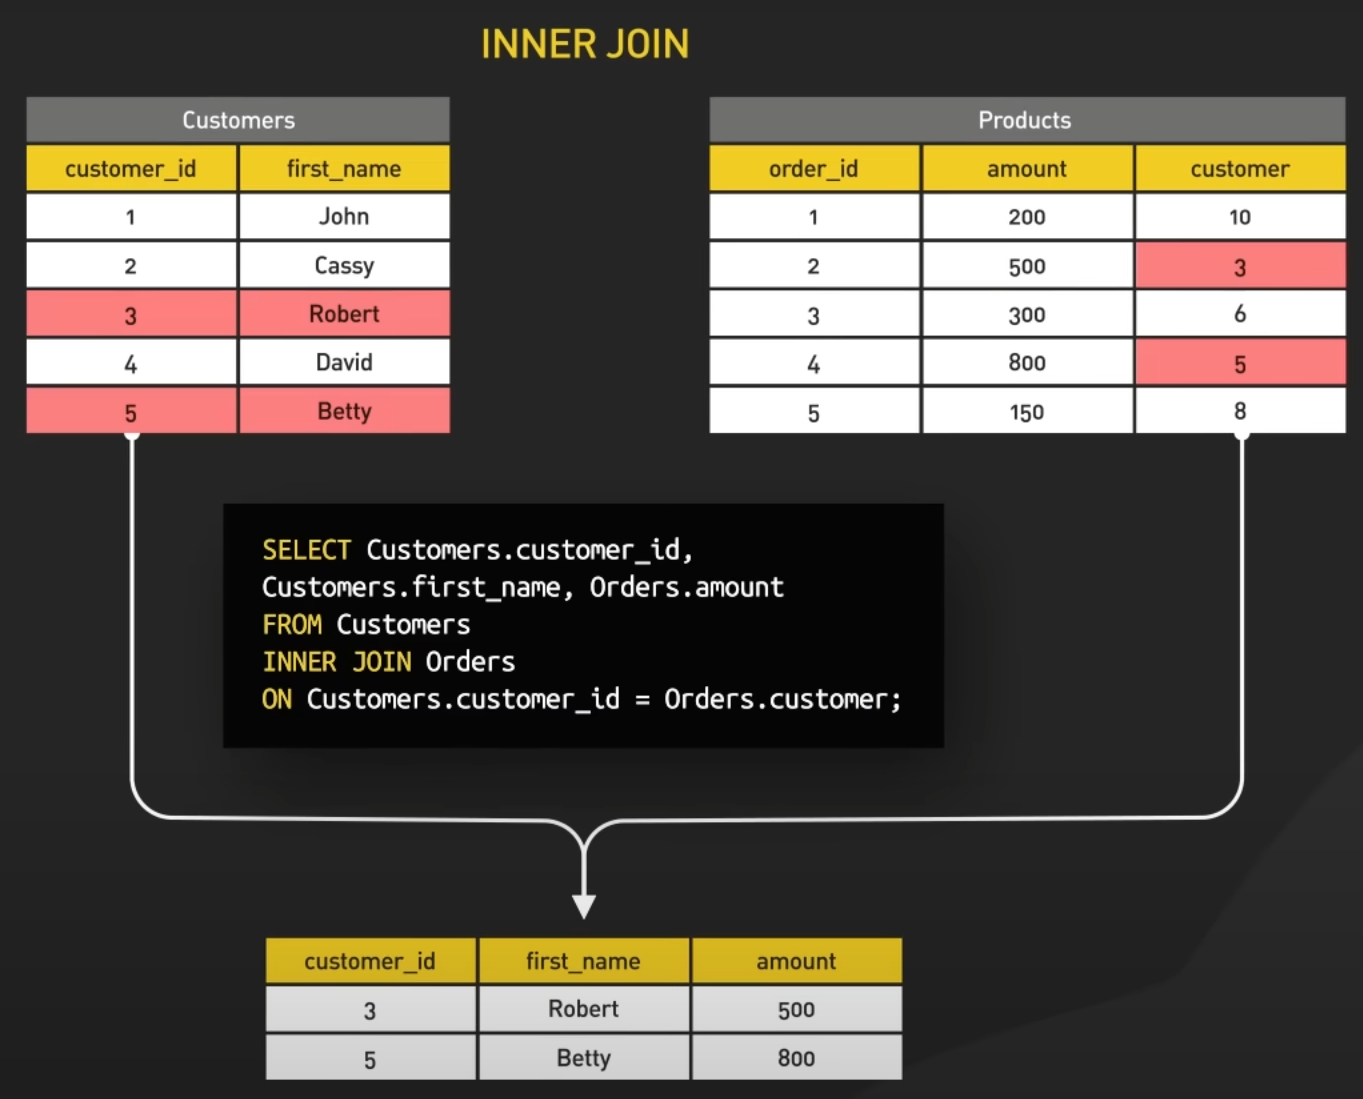

2. **Left Join (or Left Outer Join)**: Returns **all rows from the left table (table1)**, and the matched rows from the right table (table2). If there is no match, `NULL` values are returned for the columns from the right table.
   ```sql
    SELECT *
    FROM Students
    LEFT JOIN Courses ON Students.StudentID = CoursesRegister.StudentID;
   ```
3. **Right Join (or Right Outer Join)**: Returns **all rows from the right table (table2)**, and the matched rows from the left table (table1). If there is no match, `NULL` values are returned for the columns from the left table.
4. **Full Outer Join**: Returns all rows when there is a match in either left or right table. If there is no match, `NULL` values are returned for the columns from the table without a match.


## DML (Data Manipulation Language)

`DML` is used to manipulate data stored in the database. It includes commands for `inserting`, `updating`, `deleting`, and `querying` data within tables.

Common DML commands include `INSERT`, `UPDATE`, `DELETE`, and `SELECT`.

### Insert

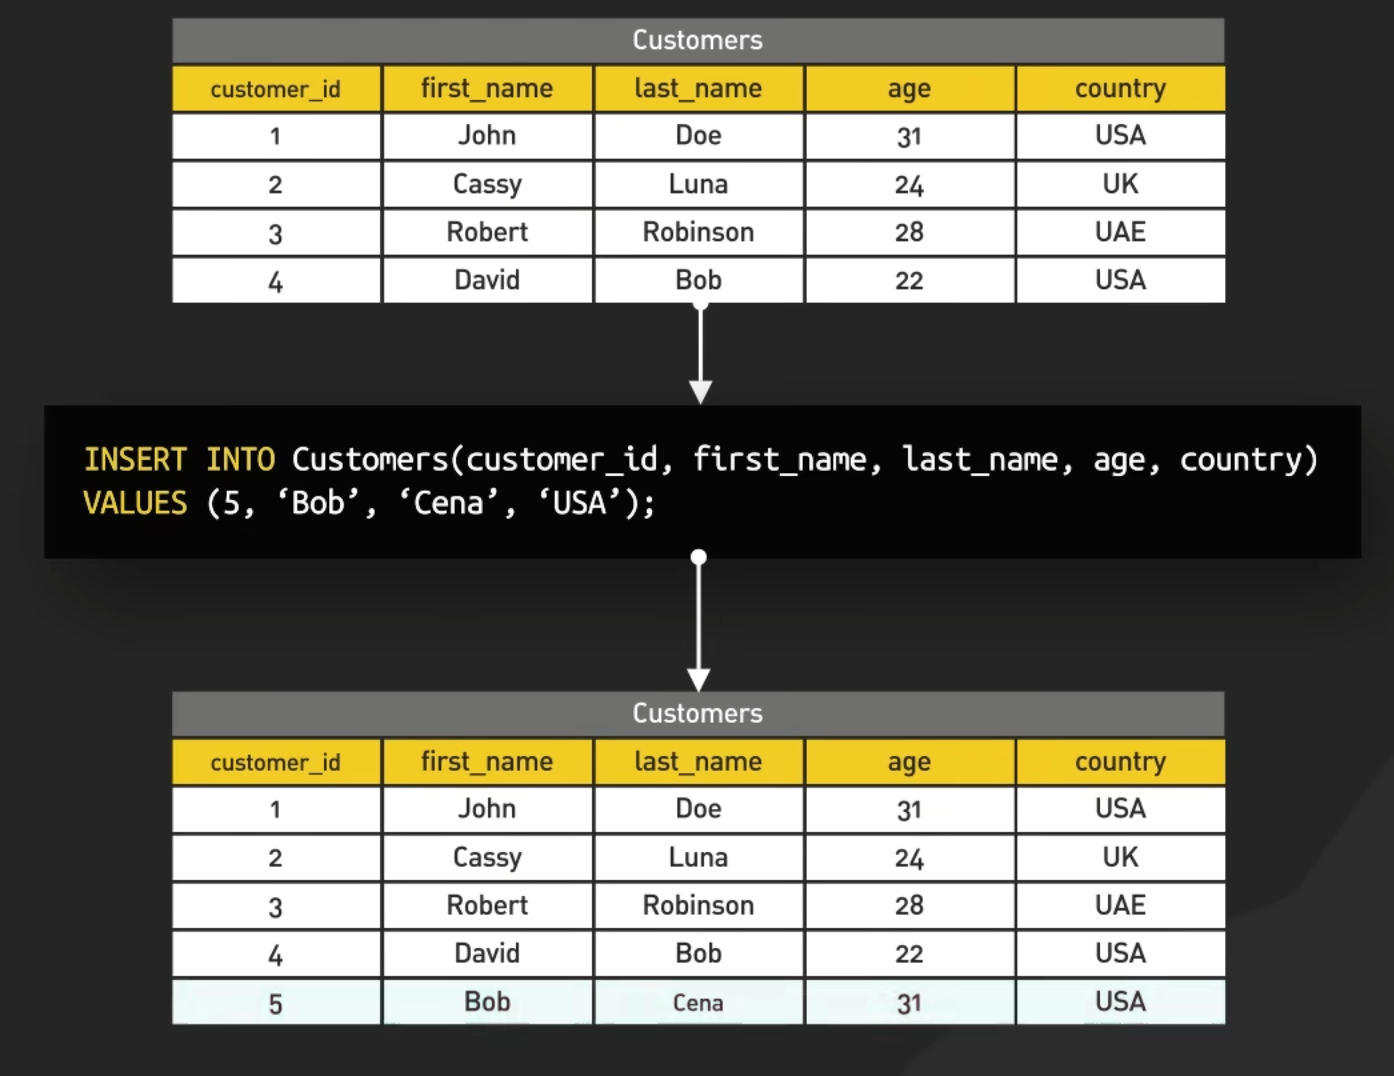


### Update

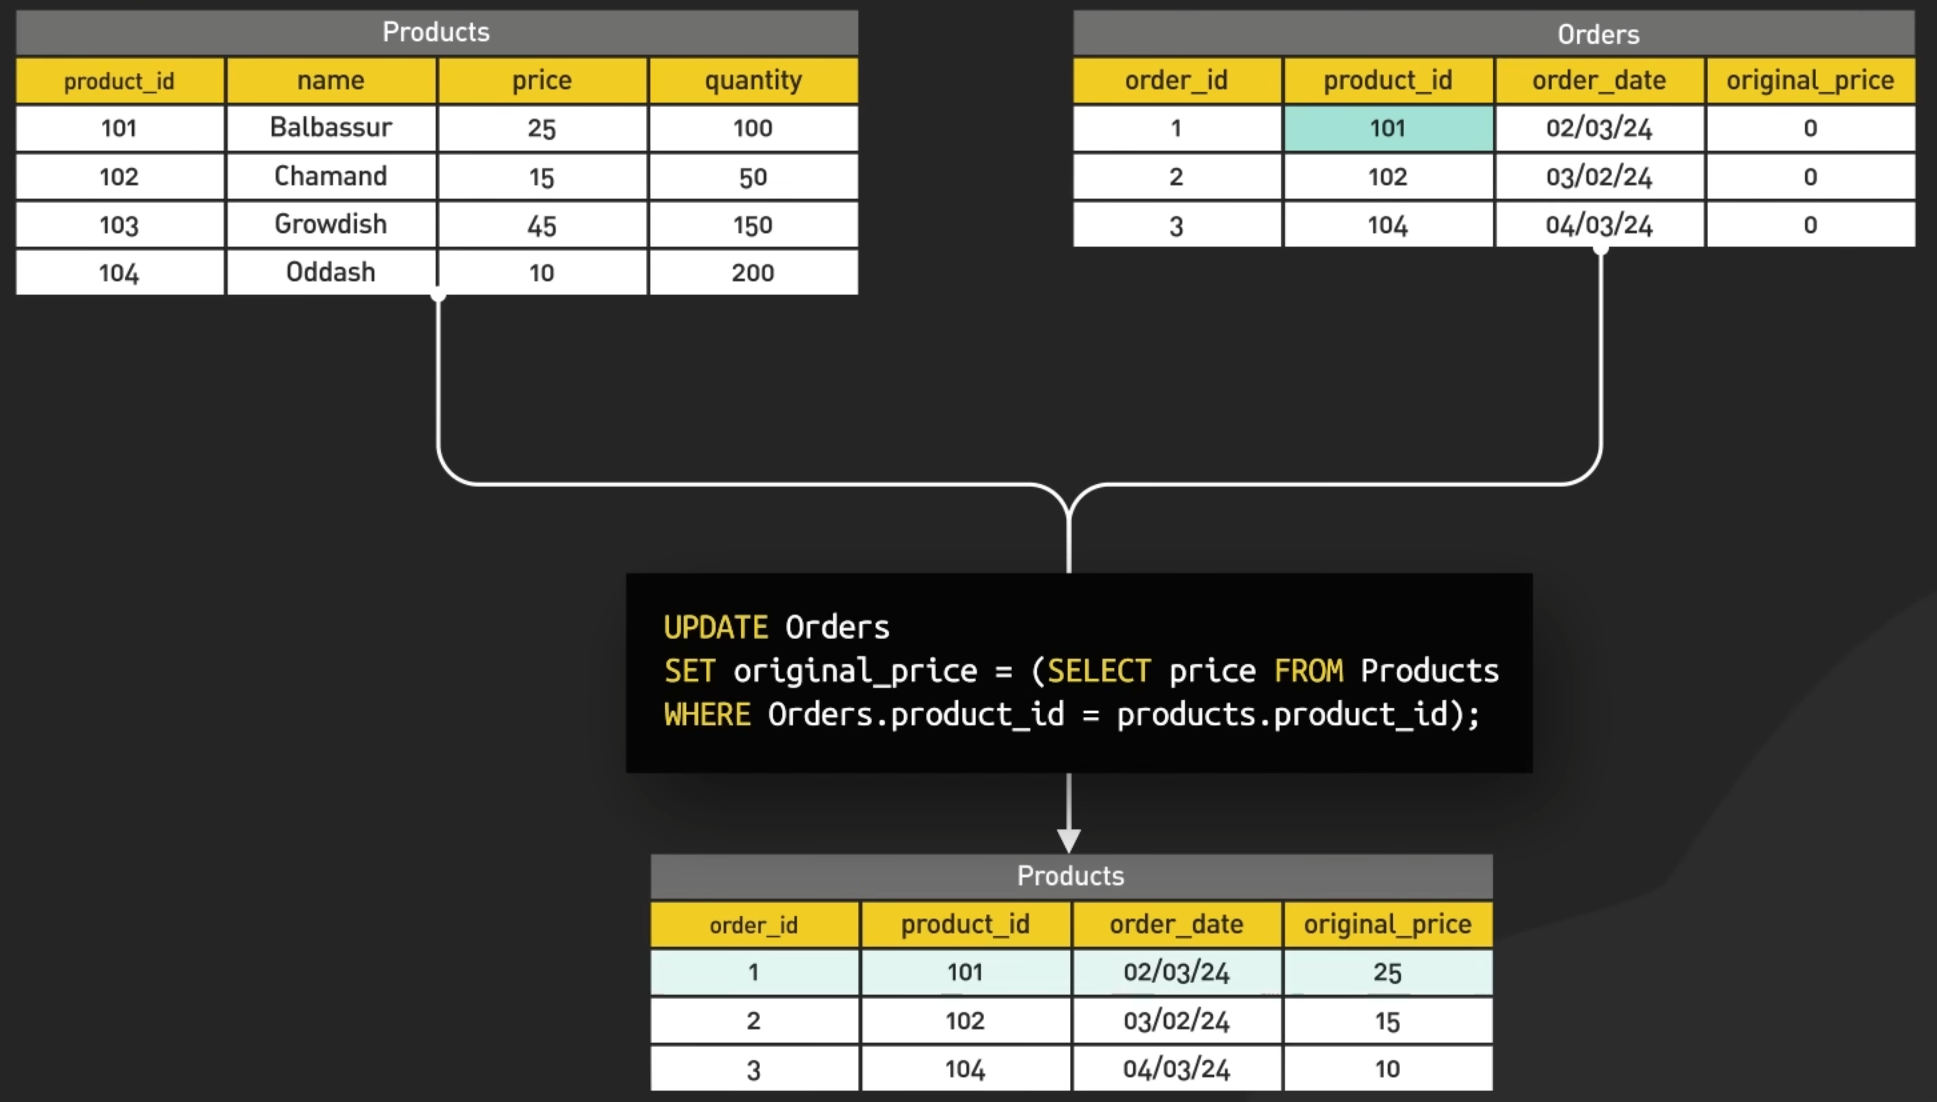


### Delete

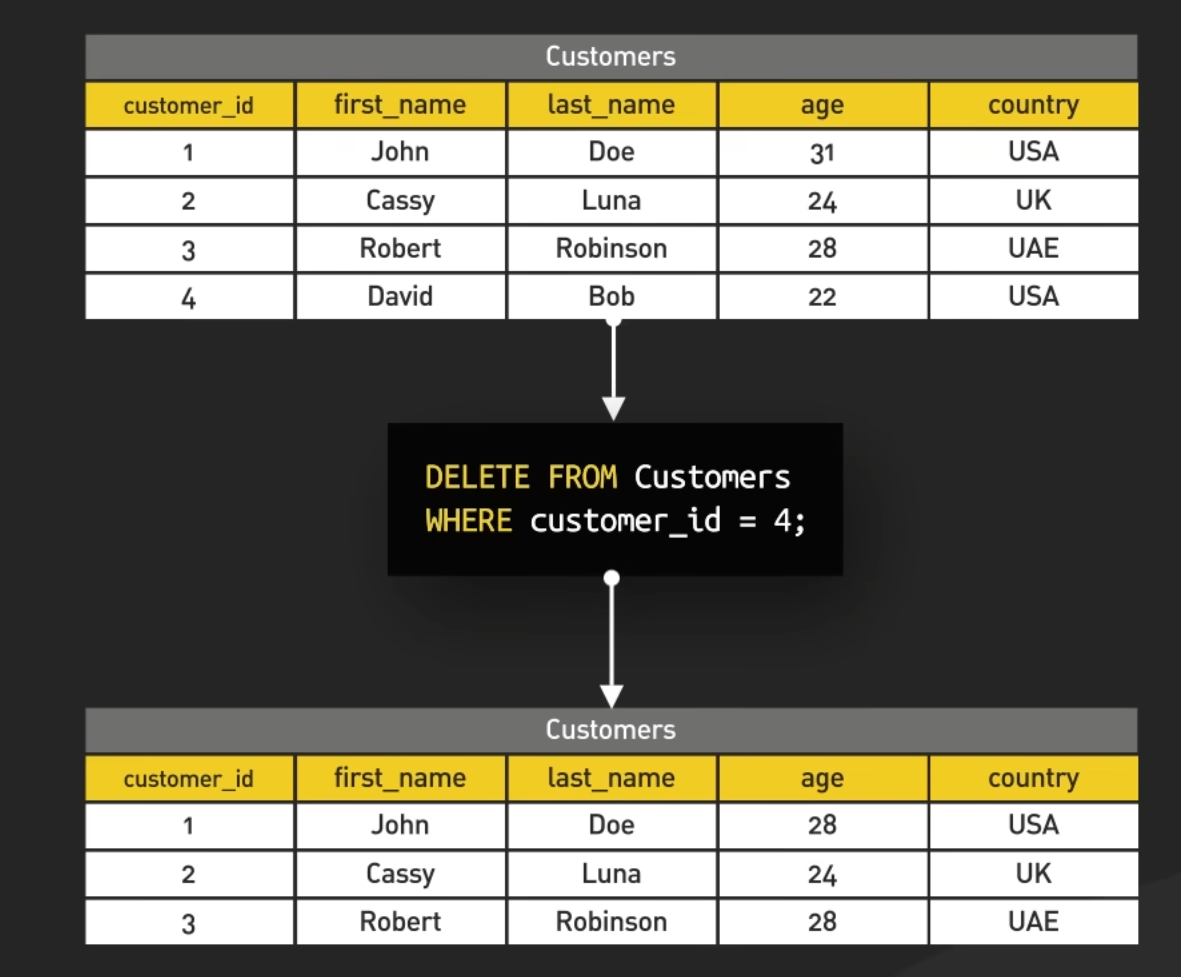


## Operators

In `SQL`, operators are used to perform operations on data within queries. There are various types of operators in `SQL`, including `arithmetic operators`, `comparison operators`, `logical operators`, and more. Here's an introduction to some common SQL operators with examples:

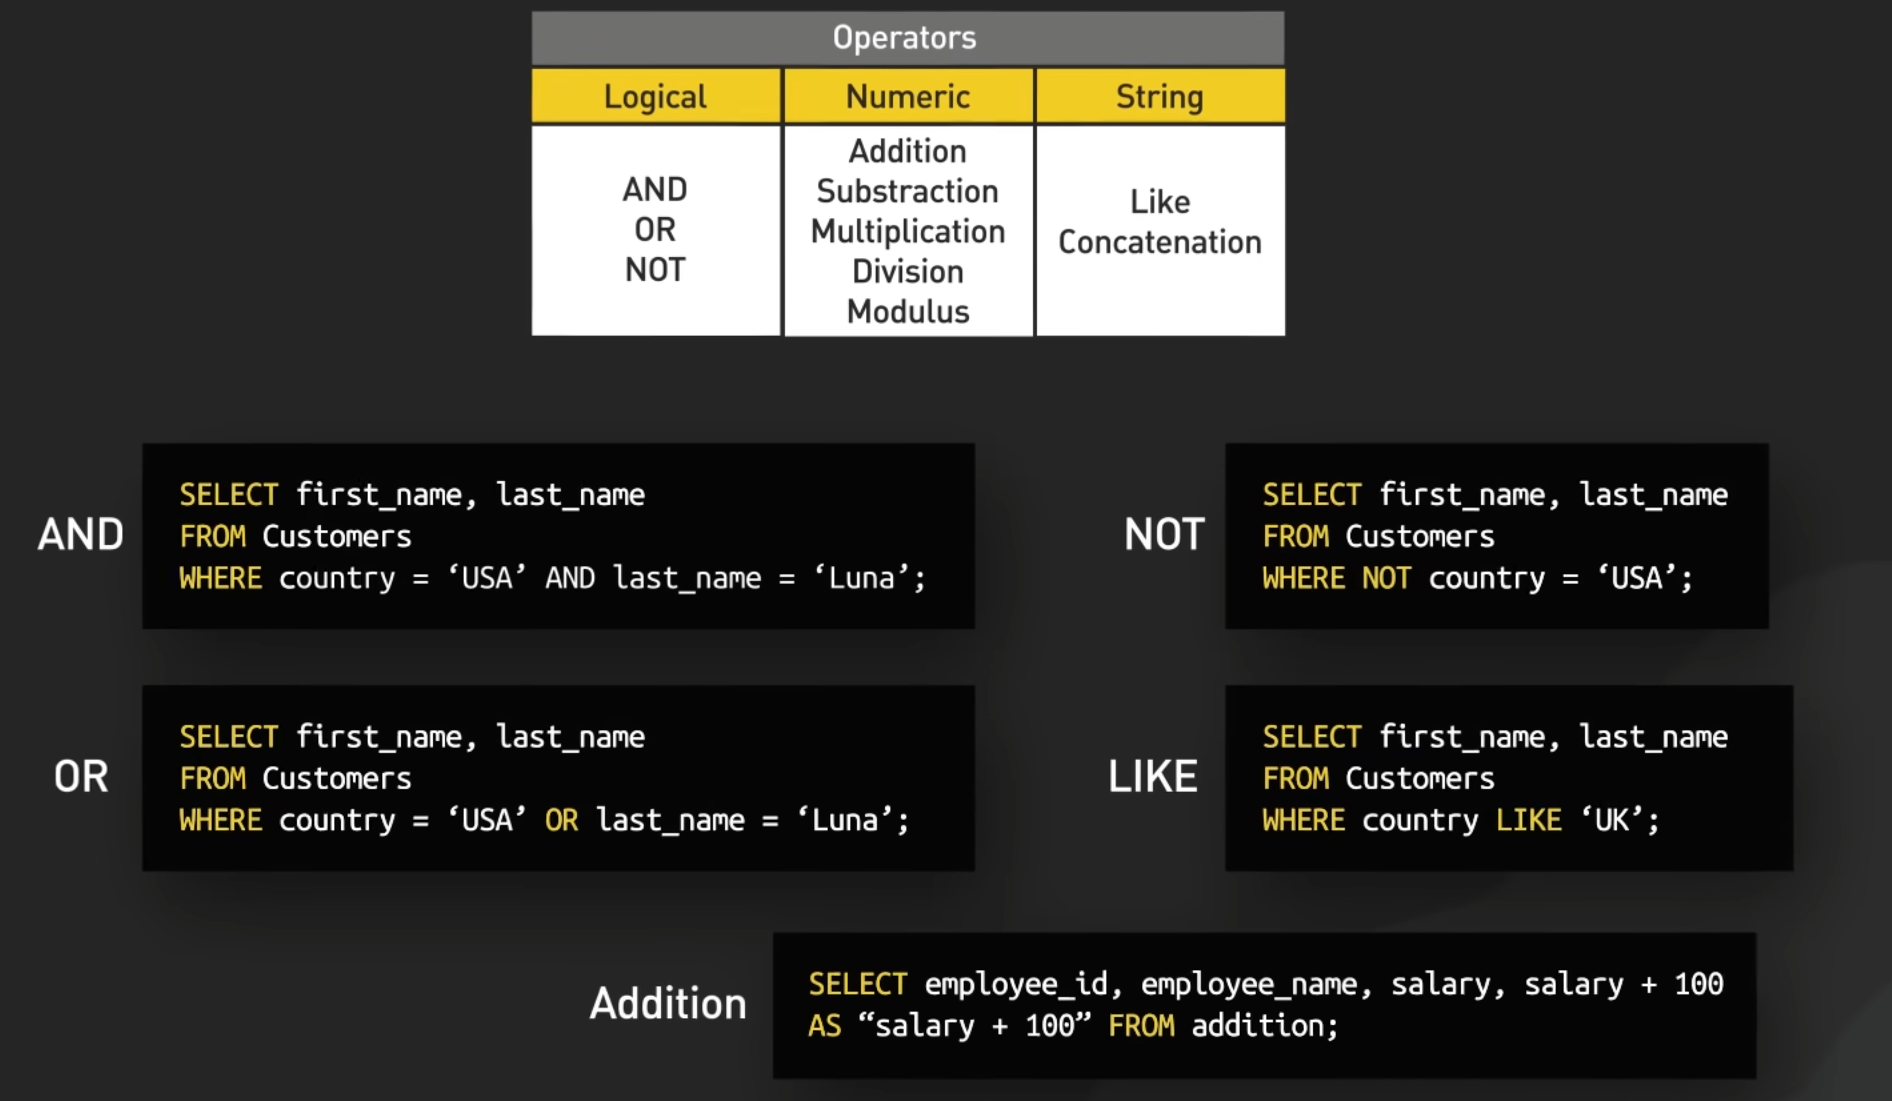

### Arithmetic Operators

- Addition (`+`), Subtraction (`-`), Multiplication (`*`), Division (`/`), and Modulus (`%`).

```sql
SELECT 10 + 5 AS Addition, 10 - 5 AS Subtraction, 10 * 5 AS Multiplication, 10 / 5 AS Division, 10 % 3 AS Modulus;
```


### Comparison Operators

Equal to (`=`), Not equal to (`<>` or `!=`), Greater than (`>`), Less than (`<`), Greater than or equal to (`>=`), Less than or equal to (`<`=).

```sql
SELECT * FROM Products WHERE Price > 100;
```

### `CONCAT` and `SUBSTRING` Operator

Concatenates two or more strings together.

```sql
SELECT FirstName || ' ' || LastName AS FullName FROM Customers;
```

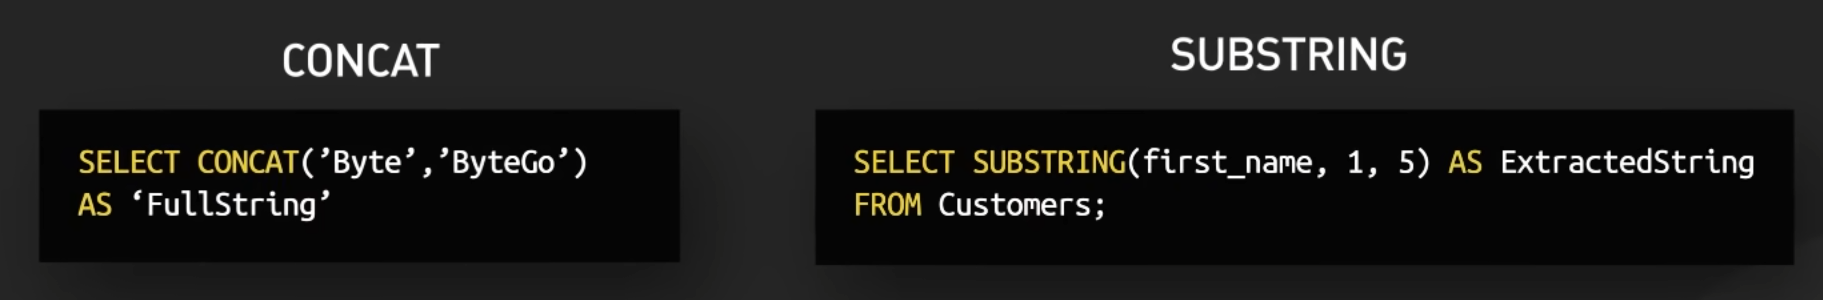

### `IN` Operator

Checks if a value matches any value in a list.

```sql
SELECT * FROM Products WHERE Category IN ('Electronics', 'Appliances');
```

### `BETWEEN` Operator

Checks if a value is within a specified range.

```sql
SELECT * FROM Orders WHERE OrderDate BETWEEN '2022-01-01' AND '2022-01-31';
```

### `LIKE` Operator

Compares a value to similar values using `wildcard` characters (`%` for zero or more characters, `_` for a single character).

```sql
SELECT * FROM Products WHERE ProductName LIKE 'Apple%';
```

### `IS NULL` / `IS NOT NULL` Operators

Checks if a value is NULL or not NULL.

```sql
SELECT * FROM Employees WHERE ManagerID IS NULL;
```

### `ANY` / `ALL` Operators

- The `ANY` operator returns `true` if the comparison is `true` for **at least one** of the values returned by the subquery.
  ```sql
  SELECT * FROM Products WHERE Price > ANY (SELECT Price FROM SpecialOffers);
  ```
  - This query selects all `products` with a `price` greater than any `price` listed in the `SpecialOffers` table.
- The `ALL` operator returns `true` if the comparison is `true` for **all** the values returned by the subquery.
  ```sql
  SELECT * FROM Orders WHERE TotalAmount > ALL (SELECT Budget FROM Departments WHERE DepartmentName = 'Sales');
  ```
  - This query selects all `orders` with a total amount greater than the `budget` of the Sales department.


### Date and Time Operator

1. Addition and Subtraction Operators (`+` and `-`)
   - These operators are used to add or subtract `intervals` from date and time values.
   - This query adds one day to the `OrderDate` and returns the next day.
   ```sql
   SELECT OrderDate + INTERVAL 1 DAY AS NextDay FROM Orders;
   ```
2. `DATEDIFF` Function
   - The `DATEDIFF` function calculates the difference between two date or datetime values.
   - This query calculates the number of days between December 25, 2021, and January 1, 2022.
   ```sql
   SELECT DATEDIFF('2022-01-01', '2021-12-25') AS DaysDifference;
   ```
3. `DATE_ADD` and `DATE_SUB` Functions
   - These functions are used to add or subtract intervals from date and datetime values.
   - This query adds one month to January 1, 2022, and returns the date of the next month.
   ```sql
   SELECT DATE_ADD('2022-01-01', INTERVAL 1 MONTH) AS NextMonth;
   ```
4. `CURRENT_DATE` and `CURRENT_TIME` Functions:
   - These functions return the current date and time, respectively.
   ```sql
   SELECT CURRENT_DATE AS Today, CURRENT_TIME AS CurrentTime;
   ```
5. `EXTRACT` Function:
   - The `EXTRACT` function extracts parts of a date or time value, such as `year`, `month`, `day`, `hour`, `minute`, etc.
   - This query extracts the `year` from the `OrderDate` column.
   ```sql
   SELECT EXTRACT(YEAR FROM OrderDate) AS OrderYear FROM Orders;
   ```


### `GROUP BY` and `HAVING` operators

1. The `GROUP BY` clause is used to group rows based on one or more columns.

   - This query calculates the total `revenue` for each `category` by grouping the rows based on the Category column.

   ```sql
   SELECT Category, SUM(Revenue) AS TotalRevenue
   FROM Sales
   GROUP BY Category;
   ```

2. The `HAVING` clause is used to filter the grouped rows based on specified conditions.

   - This query calculates the total `revenue` for each `category` and filters out `categories` with total `revenue` less than 1000 using the `HAVING` clause.

   ```sql
   SELECT Category, SUM(Revenue) AS TotalRevenue
   FROM Sales
   GROUP BY Category
   HAVING SUM(Revenue) > 1000;
   ```

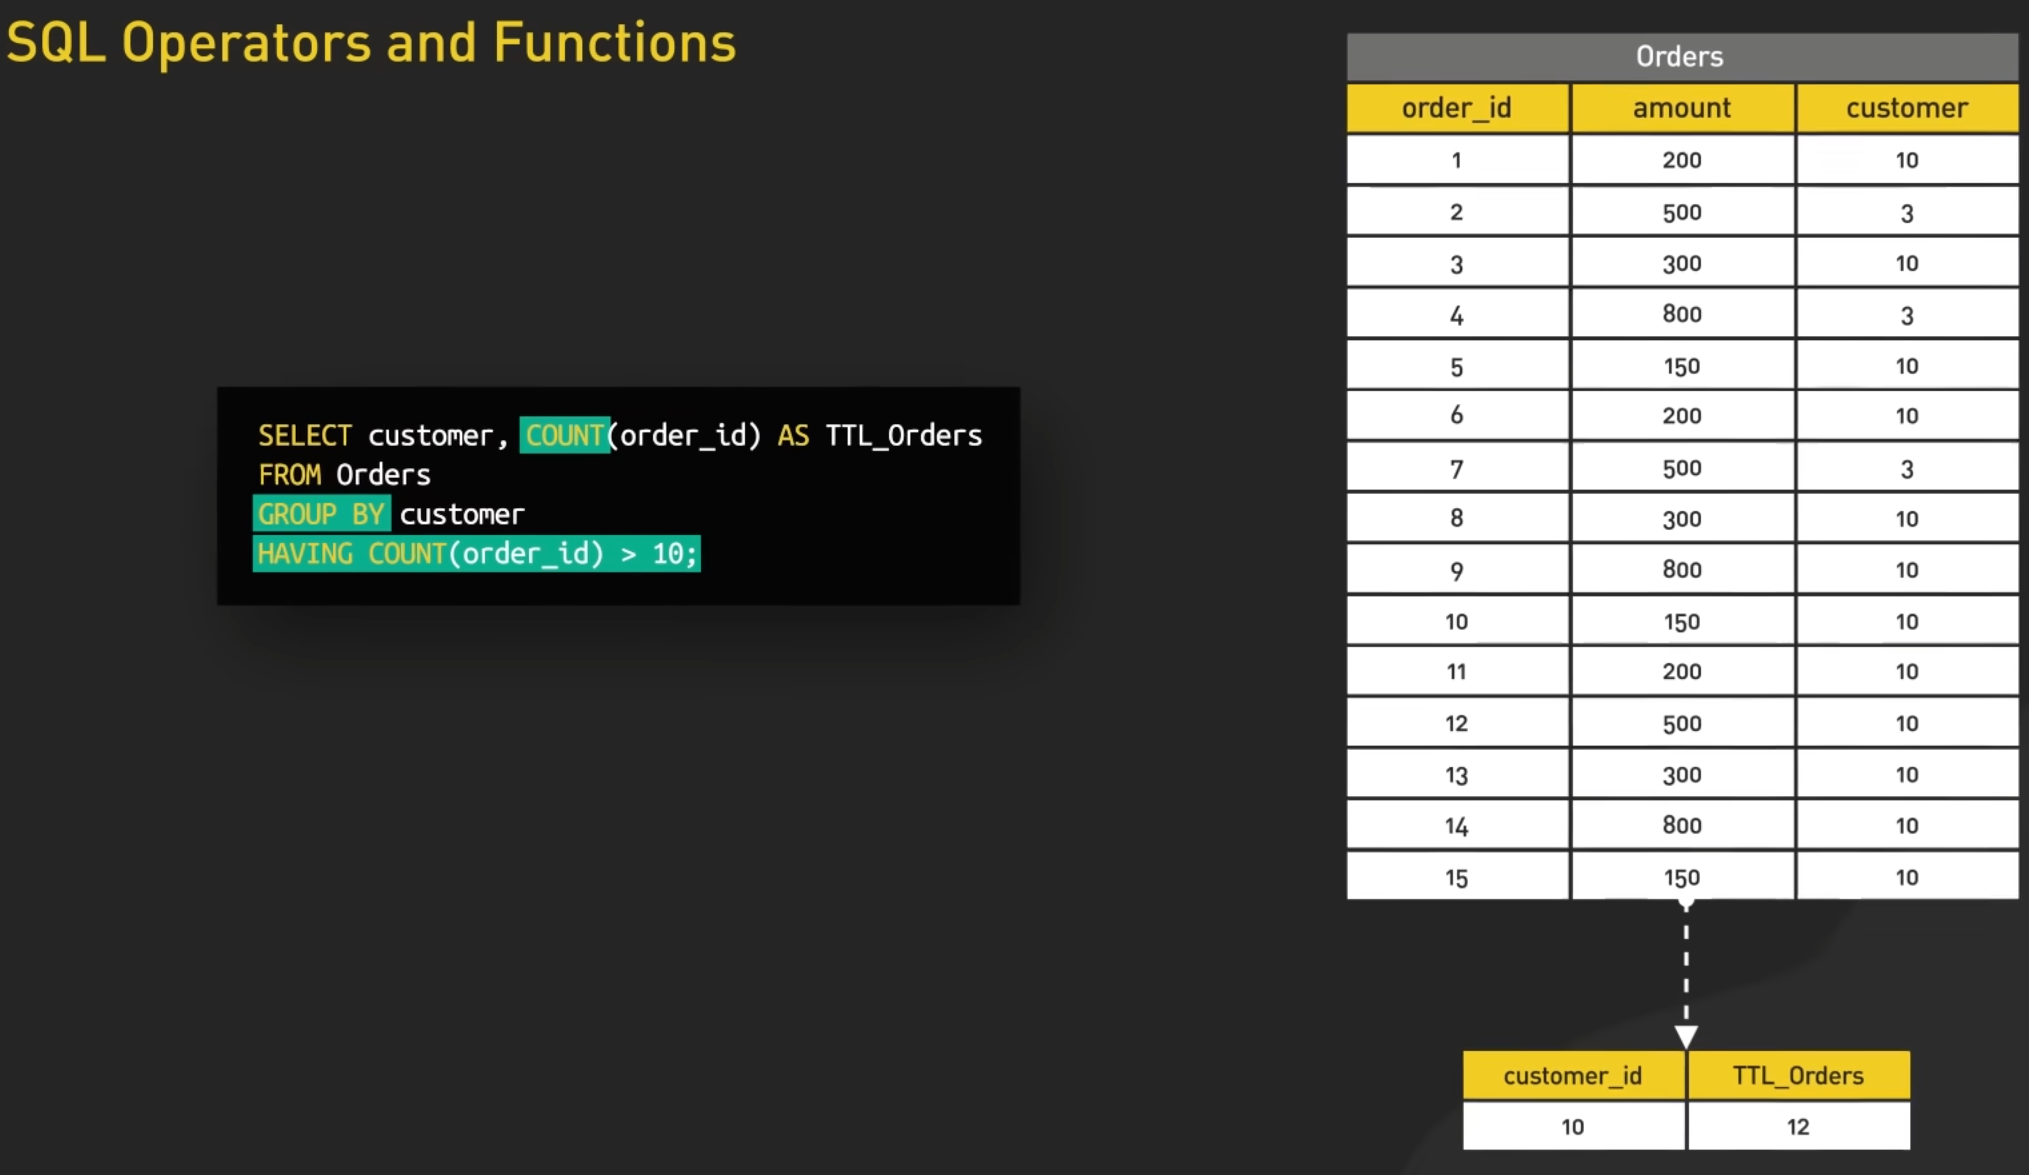


## DDL (Data Definition Language)

`DDL` is used to define the structure and schema of a database. It includes commands for creating, modifying, and deleting database objects such as `tables`, `indexes`, `views`, and `schemas`.

Common DDL commands include `CREATE`, `ALTER`, `DROP`, `TRUNCATE`, and `RENAME`.

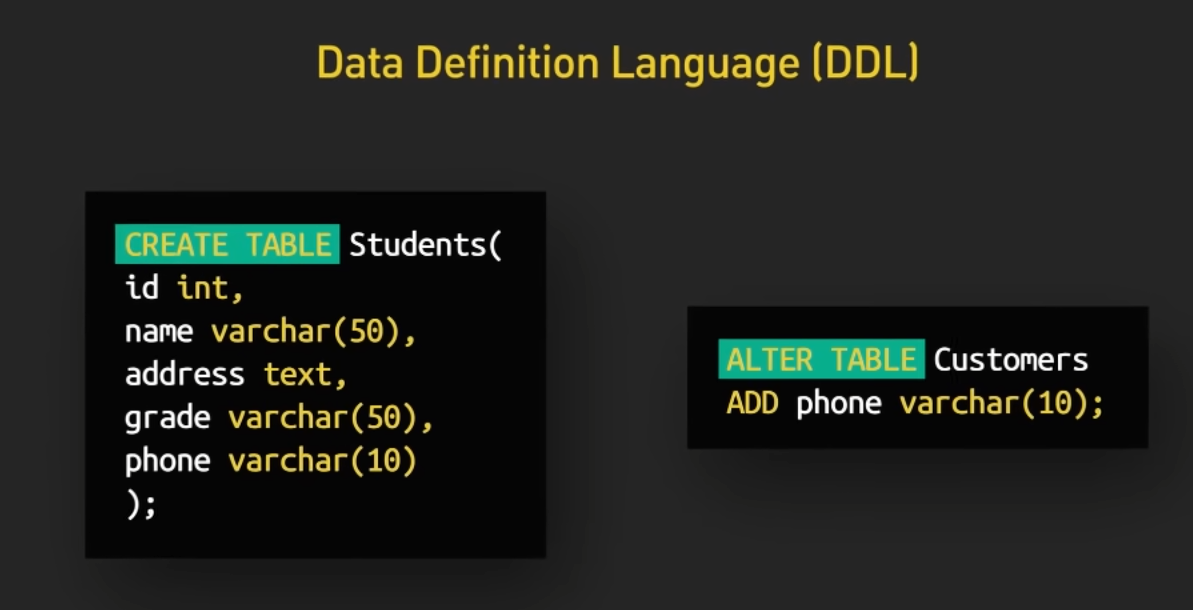

### `CREATE`

- The `CREATE` command is used to create new database objects such as `tables`, `indexes`, `views`, etc.
- This command creates a new `table` named `Employees` with columns `EmployeeID`, `FirstName`, `LastName`, and `Department`.

```sql
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    FirstName VARCHAR(50),
    LastName VARCHAR(50),
    Department VARCHAR(50)
);
```

### `ALTER`

- The `ALTER` command is used to **modify existing database objects**.
- This command adds a new column named `Salary` to the `Employees` table.

```sql
ALTER TABLE Employees
ADD Salary DECIMAL(10, 2);
```

### `DROP`

- The `DROP` command is used to **delete existing database objects**.
- This command deletes the `Employees` table and all its data from the database.

```sql
DROP TABLE Employees;
```

### `TRUNCATE`

- The `TRUNCATE` command is used to **delete all rows** from a table but **keeps the table structure** intact.
- This command **removes all rows** from the `Employees` table, but the table structure remains.

```sql
TRUNCATE TABLE Employees;
```

### `RENAME`

- The `RENAME` command is used to rename existing database objects.
- This command renames the column `FirstName` in the `Employees` table to `First_Name`.

```sql
ALTER TABLE Employees
RENAME COLUMN FirstName TO First_Name;
```

### `CAST` and `::`

- The `CAST` command is used to explicitly specify the data type to which you want to convert a value.

```sql
SELECT CAST('10' AS INT);
SELECT '10'::INT; -- Same
SELECT * FROM Employees WHERE CAST(Salary AS DECIMAL) > 50000;
```


## DCL (Data Control Language)

`DCL` is used to manage access permissions and control database operations. It includes commands for **granting and revoking privileges to users and roles**.

Common DCL commands include `GRANT` and `REVOKE`.

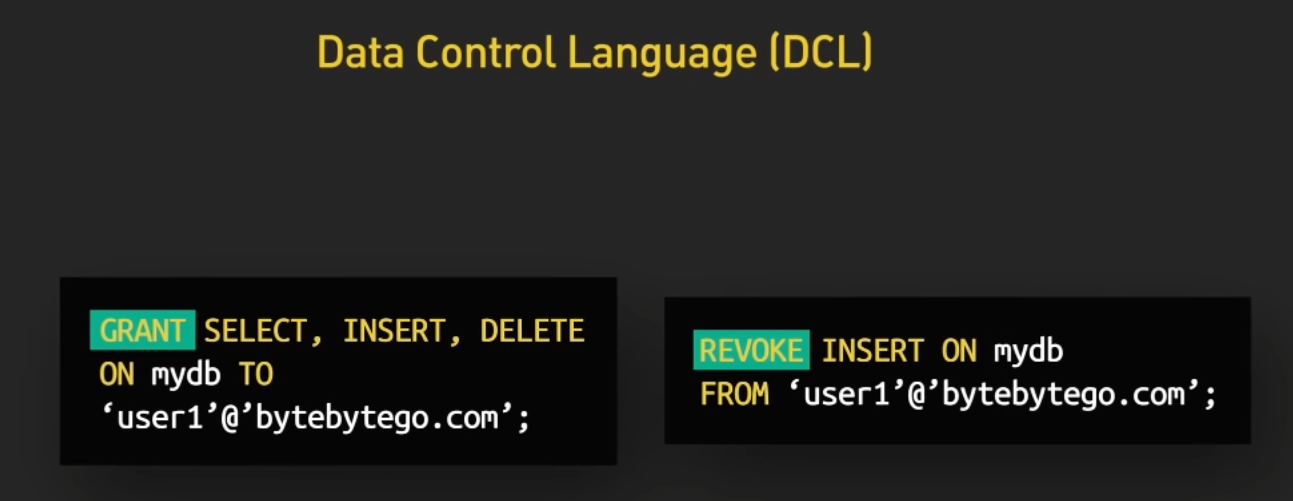

### `GRANT`

- The `GRANT` command is used to give specific privileges to a user or role.
- This command grants the `SELECT` and `INSERT` privileges on the `Employees` table to the user named `user1`. Now, `user1` can select and insert data into the Employees table.

  ```sql
  GRANT SELECT, INSERT ON Employees TO user1;
  ```

### `REVOKE`

- The `REVOKE` command is used to revoke previously granted privileges from a user or role.
- This command revokes the `INSERT` privilege on the `Employees` table from the user named `user1`. Now, user1 **no longer has permission to insert data** into the Employees table.

  ```sql
  REVOKE INSERT ON Employees FROM user1;
  ```


## TCL (Transaction Control Language)

TCL is used to manage transactions within the database. It includes commands for starting, committing, and rolling back transactions to ensure data integrity and consistency.

Common TCL commands include `COMMIT`, `ROLLBACK`, and `SAVEPOINT`.

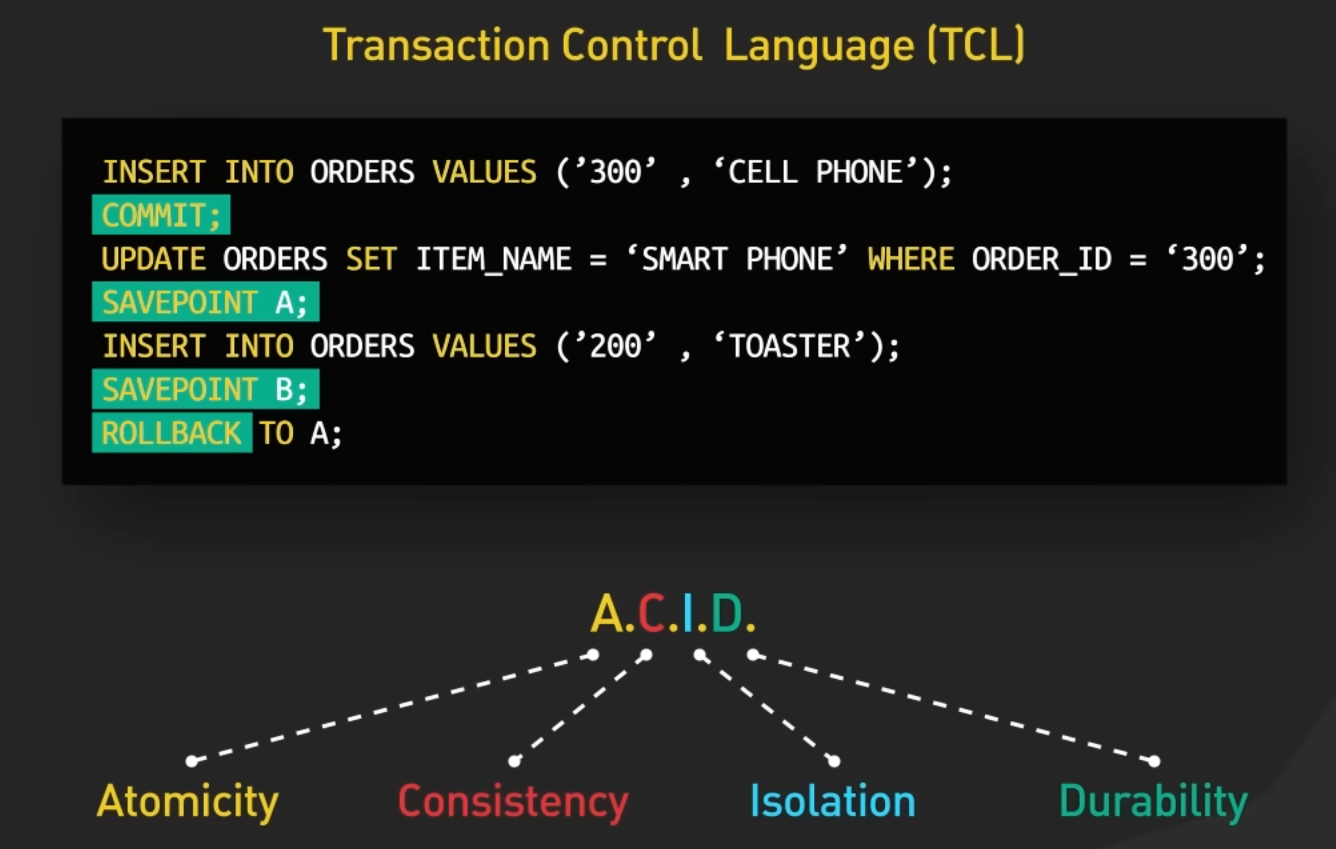
